In [17]:
import pandas as pd
import json
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import linregress
from matplotlib import pyplot as plt
import scipy.stats as stats
from pprint import pprint

In [2]:
df = pd.read_csv('../Output/MASTER_NBA_DATA.csv')
df

,GameID,Date,City,Country,Home Team,Away Team,Attendance,Home Score,Home 1st Q,Home FG%,Home 3pt%,Home FT%,Away Score,Away 1st Q,Away FG%,Away 3pt%,Away FT%
0,4c06f6af-980b-41b3-85c3-5975d8e03956,2018-10-17T00:00:00+00:00,Boston,USA,Celtics,76ers,18624,105,21,43.3,29.7,71.4,87,21,39.1,19.2,60.9
1,3594f3a2-86b8-4337-83d3-269c078c7f1f,2018-10-17T02:30:00+00:00,Oakland,USA,Warriors,Thunder,19596,108,31,44.2,26.9,94.4,100,23,36.3,27.0,64.9
2,24b19539-d496-460a-9e9b-2194d0fcc82a,2018-10-17T23:00:00+00:00,Detroit,USA,Pistons,Nets,20332,103,24,42.4,25.0,86.4,100,29,48.8,18.5,68.2
3,35a15ba5-77f8-45f5-91a6-79bbc3fbf989,2018-10-17T23:00:00+00:00,Charlotte,USA,Hornets,Bucks,17889,112,23,44.6,42.1,63.6,113,36,49.4,41.2,75.0
4,b83e3709-b996-4df3-b448-af91c5566187,2018-10-17T23:00:00+00:00,Indianapolis,USA,Pacers,Grizzlies,17923,111,27,56.6,38.5,53.8,83,16,29.8,34.5,82.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2221,2e7659ab-50fe-4048-b896-4a3b9ca346f9,2020-03-11T00:00:00+00:00,San Antonio,USA,Spurs,Mavericks,18064,107,26,46.8,28.9,81.5,131,35,50.0,45.5,100.0
2222,3f682d28-3eca-4448-b4a3-c32b9130e091,2020-03-11T00:00:00+00:00,Houston,USA,Rockets,Timberwolves,20172,124,34,50.6,42.4,81.3,106,29,46.4,31.4,68.0
2223,3c13e4eb-7367-4817-9ddd-48366bda87ab,2020-03-11T02:00:00+00:00,Portland,USA,Trail Blazers,Suns,19600,98,40,46.4,34.1,83.3,109,22,45.1,50.0,81.8
2224,bacce297-90ca-45ac-a472-0b7cf57c352e,2020-03-11T02:30:00+00:00,Los Angeles,USA,Lakers,Nets,15393,131,24,45.3,34.1,80.8,136,33,53.2,39.3,73.5


In [3]:
team_list = df['Home Team'].unique()
team_list

array(['Celtics', 'Warriors', 'Pistons', 'Hornets', 'Pacers', 'Magic',
       'Knicks', 'Raptors', 'Rockets', 'Spurs', 'Kings', 'Suns',
       'Clippers', '76ers', 'Wizards', 'Trail Blazers', 'Nets',
       'Timberwolves', 'Pelicans', 'Grizzlies', 'Bucks', 'Jazz', 'Bulls',
       'Heat', 'Mavericks', 'Nuggets', 'Lakers', 'Cavaliers', 'Thunder',
       'Hawks', 'Team USA', 'Team Giannis East', 'Los Angeles Lakers'],
      dtype=object)

In [4]:
attendance_list = df[['Home Team']]

In [5]:
df.head(1)
data_frame = df.drop(columns = ['GameID','Date', 'City', 'Country', 'Home Team', 'Away Team', 'Attendance'])
column_list = data_frame.columns.values.tolist()

In [6]:
team_group= df.groupby(['Home Team'])
deliverable = team_group['Attendance'].describe().reset_index()
def_deliverable = deliverable[['Home Team','25%','50%','75%']]
deliverable['std'].max()
deliverable.loc[deliverable['std']==2719.4770614630006]

,Home Team,count,mean,std,min,25%,50%,75%,max
29,Timberwolves,73.0,17075.890411,2719.477061,10079.0,15883.0,18055.0,18978.0,21496.0


In [7]:
#df.plot.scatter(x='attendance',y='Home Score')

<Figure size 432x288 with 0 Axes>

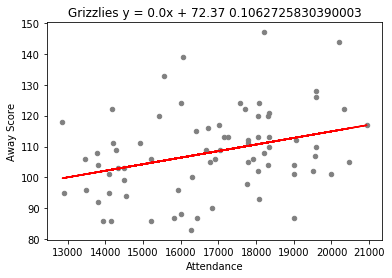

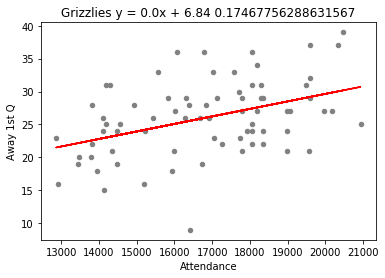

In [9]:
fig = plt.figure()

for i in team_list:
    holding_df = df[df['Home Team']==i]
    for y_details in column_list:
        (slope, intercept, rvalue, pvalue, stderr) = linregress(holding_df['Attendance'], holding_df[y_details])
        if ((rvalue**2 >= .1) | (rvalue**2 <=-.1)) & (i != "Team USA") & (i != "Team Giannis East"):
            regress_values = holding_df['Attendance'] * slope + intercept
            line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
            holding_df.plot.scatter(x='Attendance',y=y_details, title = i+" "+line_eq+' '+str(rvalue**2), color = 'grey')
            plt.plot(holding_df['Attendance'],regress_values,"r-")
            fig.savefig('../Images/'+i+", "+y_details+".jpeg")

            
        #plt.annotate(line_eq,(6,10),fontsize=15,color="red")


In [15]:
dataFrameList = []
relevant = []
irrelevant = []
for i in team_list:
    team_df = df[df['Home Team']==i]
    for c in column_list:
        sample = team_df[c]
        population = df[c]
        pvalue = stats.ttest_1samp(sample, population.mean())[1]
        if (stats.ttest_1samp(sample, population.mean())[1]) <= .05:
            relevant.append(i+" has a relevant Pvalue of "+str(pvalue)+"for their "+c+" statistic")
        elif (stats.ttest_1samp(sample, population.mean())[1]) > .05:
            irrelevant.append(i+" does not have a relevant Pvalue of "+str(pvalue)+"for their "+c+" statistic")

In [19]:
for value in relevant:
    print(value)

Celtics has a relevant Pvalue of 0.00515551995722044for their Home FT% statistic
Warriors has a relevant Pvalue of 0.03055286939610328for their Home FT% statistic
Pistons has a relevant Pvalue of 0.01426459242728234for their Home Score statistic
Pistons has a relevant Pvalue of 0.03131007919219245for their Home FG% statistic
Pacers has a relevant Pvalue of 0.007813289295662421for their Away Score statistic
Pacers has a relevant Pvalue of 0.03285877156414788for their Away FG% statistic
Knicks has a relevant Pvalue of 0.04149939375802272for their Home FG% statistic
Knicks has a relevant Pvalue of 0.0231420219206105for their Away Score statistic
Raptors has a relevant Pvalue of 0.02017738089157962for their Home Score statistic
Spurs has a relevant Pvalue of 0.0416694078620343for their Home 3pt% statistic
Spurs has a relevant Pvalue of 0.03353704127981113for their Away 3pt% statistic
Suns has a relevant Pvalue of 0.03957615208835864for their Home Score statistic
Clippers has a relevant Pva

In [ ]:
print(irrelevant)